In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:\\Users\\admin\\Downloads\\archive (9)\\Data.csv')

In [3]:
df.head()
#.head() : show the top few rows of a DataFrame 

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

In [4]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
df.isin(['?']).sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [6]:
df = df.replace('?',np.nan) #replaces ? with NaN

In [7]:
df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean


C:\Users\admin\AppData\Local\Temp\ipykernel_16948\1285181073.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean


In [8]:
df

Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes

In [9]:
X = df.drop(['Purchased'],axis=1)  
y = df.Purchased

In [10]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
X['Country']=le.fit_transform(X['Country']) 
df['Purchased']=le.fit_transform(df['Purchased']) 
X['Country']
df['Purchased']

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Purchased, dtype: int32

In [11]:
df

Country        Age        Salary  Purchased
0   France  44.000000  72000.000000          0
1    Spain  27.000000  48000.000000          1
2  Germany  30.000000  54000.000000          0
3    Spain  38.000000  61000.000000          0
4  Germany  40.000000  63777.777778          1
5   France  35.000000  58000.000000          1
6    Spain  38.777778  52000.000000          0
7   France  48.000000  79000.000000          1
8  Germany  50.000000  83000.000000          0
9   France  37.000000  67000.000000          1

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42, shuffle=True)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


[Text(0.5, 0.9, 'Country <= 0.905\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3333333333333333, 0.7, 'Salary <= -0.86\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5, 'Age <= 0.617\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.3, 'Age <= 1.4\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

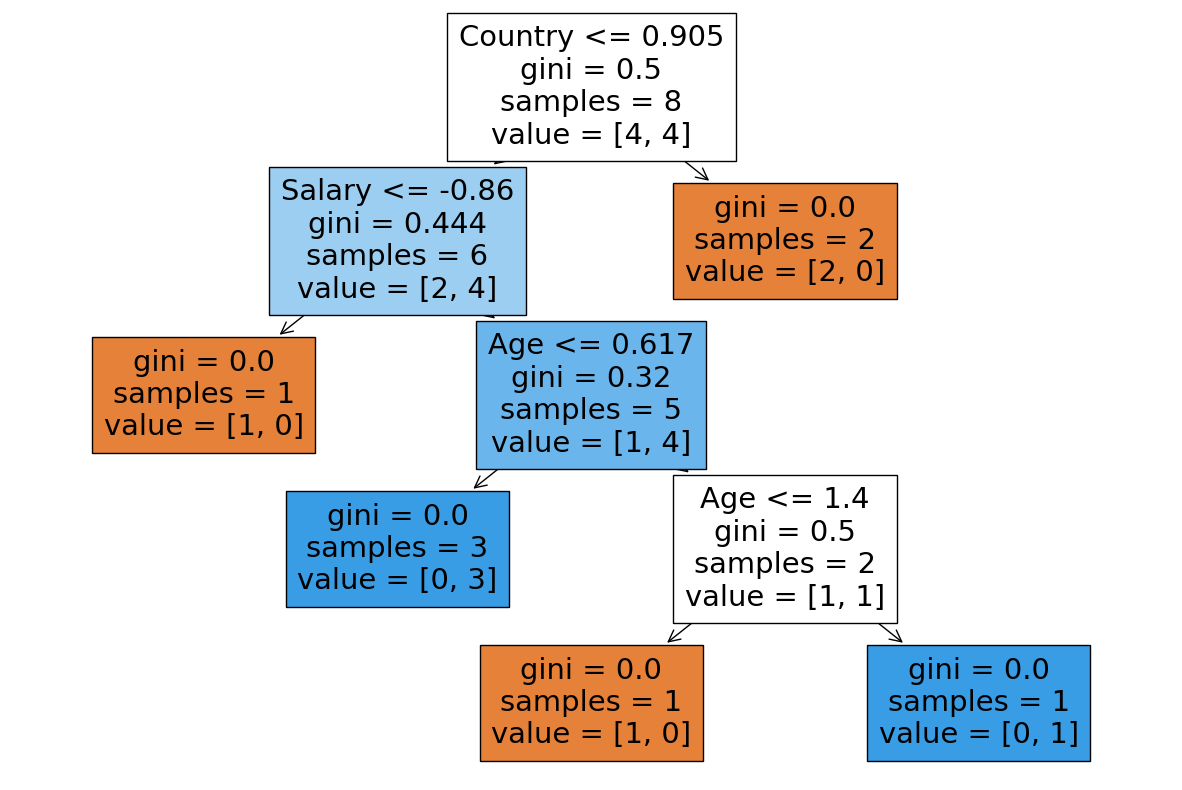

In [16]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree, feature_names=X.columns, filled=True)
# tree.plot_tree(dtree, feature_names=df[X])


In [19]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)


C:\Users\admin\OneDrive\Documents\ana1\envs\IS_2_LAB_Musaddique\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\OneDrive\Documents\ana1\envs\IS_2_LAB_Musaddique\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\OneDrive\Documents\ana1\envs\IS_2_LAB_Musaddique\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [20]:
print(cm)


[[1 0]
 [1 0]]


In [21]:
print(dtree.predict([[1, 55, 54000]]))  #0 means no 




['No']


In [22]:
df

Country        Age        Salary  Purchased
0   France  44.000000  72000.000000          0
1    Spain  27.000000  48000.000000          1
2  Germany  30.000000  54000.000000          0
3    Spain  38.000000  61000.000000          0
4  Germany  40.000000  63777.777778          1
5   France  35.000000  58000.000000          1
6    Spain  38.777778  52000.000000          0
7   France  48.000000  79000.000000          1
8  Germany  50.000000  83000.000000          0
9   France  37.000000  67000.000000          1

In [ ]:
#YAHASE PREPROCESSING WALA PART START UPAR DECESION WLA KHATM

In [4]:
df.corr()
#correlation matrix  .corr() method can be useful for identifying patterns and relationships

C:\Users\admin\AppData\Local\Temp\ipykernel_19620\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000

In [5]:
df.info()
#.info() is a method that provides a summary of a DataFrame including the data types,
#number of non-null values, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isna().sum()
#.isna().sum(), it returns the total count of missing or null values 
#in each column of a Pandas DataFrame.

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.isin(['?']).sum()
#returns the total count of elements in each column of the DataFrame
#that are equal to the string '?'.

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.describe()
#alculates various statistics for each numerical column in the DataFrame, 

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
df.duplicated().sum()
#gives sum of duplicates

24

In [12]:
for i in df.columns:
 a = df[i].value_counts()
 print(f'\n\n\nvalues of {a}')




values of 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64



values of Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64



values of 164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64



values of HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
N

In [13]:
df = df.replace('?',np.nan)
#occurrences of the string '?' in a Pandas DataFrame df with NaN values.

In [14]:
df.isna().sum()
#returns the count of missing values 

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64